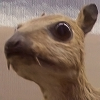

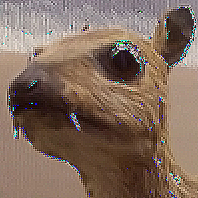

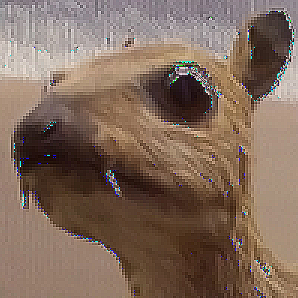

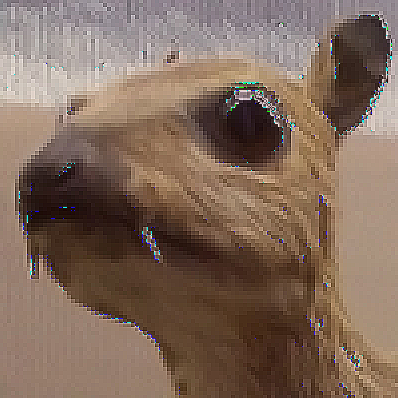

In [4]:
from PIL import Image
import numpy as np
from itertools import chain

def convolute(matrix,kernel):
    m = len(matrix)
    n = len(matrix[0])
    matrix_n = np.array(matrix)
    result = np.zeros((m-2,n-2)).tolist()
    for i in range(m-2):
        for j in range(n-2):
            temp_copy = matrix_n[i:i+3, j:j+3].tolist()
            temp_res = [[a*b for a, b in zip(ii, jj)] for ii, jj in zip(temp_copy, kernel)]
            result[i][j] = sum(list(chain.from_iterable(temp_res)))
    resultt = np.array(result)
    return resultt


def convert(l1d,form):
    n1 = np.array(l1d)
    res = n1.reshape(form)
    return res

def in2d(ww,hh):
    xxx = np.zeros((ww,hh))
    yyy = xxx.tolist()
    return yyy

def upscale(pic, factor):
    rr = pic[:,:,0]
    gg = pic[:,:,1]
    bb = pic[:,:,2]
    w = pic.shape[0]
    h = pic.shape[1]
    wn = w*factor
    hn = h*factor

    cubes_0 = np.ones((wn, hn))
    cubes_rr = in2d(w,h)
    for oo in range(w):
        for pp in range(h):
            cubes_rr[oo][pp] = np.ones((factor,factor)) * rr[oo,pp]
    
    for ii in range(0,w*factor,factor):
        for jj in range(0,h*factor,factor):
            cubes_0[ii:ii+factor,jj:jj+factor] = cubes_rr[ii//factor][jj//factor]


    cubes_1 = np.ones((wn, hn))
    cubes_gg = in2d(w,h)
    for oo in range(w):
        for pp in range(h):
            cubes_gg[oo][pp] = np.ones((factor,factor)) * gg[oo,pp]
    for ii in range(0,w*factor,factor):
        for jj in range(0,h*factor,factor):
            cubes_1[ii:ii+factor,jj:jj+factor] = cubes_gg[ii//factor][jj//factor]

    cubes_2 = np.ones((wn, hn))
    cubes_bb = in2d(w,h)
    for oo in range(w):
        for pp in range(h):
            cubes_bb[oo][pp] = np.ones((factor,factor)) * bb[oo,pp]

    for ii in range(0,w*factor,factor):
        for jj in range(0,h*factor,factor):
            cubes_2[ii:ii+factor,jj:jj+factor] = cubes_bb[ii//factor][jj//factor]
    
    res = np.zeros((w*factor,h*factor,3))
    res[:,:,0] = cubes_0
    res[:,:,1] = cubes_1
    res[:,:,2] = cubes_2
    
    return res



def upscale_sharpen (pic,factor):

    pic = np.array(pic)
    pics = upscale(pic,factor)

    kerneli = [[0,-1,0],[-1,5,-1],[0,-1,0]]
    #kerneli = [[0,0,0],[0,1,0],[0,0,0]]
    com_r = pics[:,:,0]
    com_g = pics[:,:,1]
    com_b = pics[:,:,2]

    sh_r = convolute(com_r,kerneli)
    sh_g = convolute(com_g,kerneli)
    sh_b = convolute(com_b,kerneli)

    w = pic.shape[0]
    h = pic.shape[1]
    wn = w*factor
    hn = h*factor

    outpic = np.zeros((wn-2,hn-2,3))

    outpic[:,:,0] = sh_r
    outpic[:,:,1] = sh_g
    outpic[:,:,2] = sh_b

    outpic_img = Image.fromarray(np.uint8(outpic)).convert('RGB')

    return outpic_img

testing = Image.open('sample1.png').convert('RGB')
display(testing)
print("\n")

testing_pr = upscale_sharpen (testing,2)
display(testing_pr)
print("\n")

testing_pr = upscale_sharpen (testing,3)
display(testing_pr)
print("\n")

testing_pr = upscale_sharpen (testing,4)
display(testing_pr)
print("\n")


